## Carregando embeddings e chunks:

In [61]:
import pickle

with open('variaveis_embeddings/embeddings_mat.pkl', 'rb') as f:
    embeddings_mat = pickle.load(f)
with open('variaveis_embeddings/embeddings_port.pkl', 'rb') as f:
    embeddings_port = pickle.load(f)
with open('variaveis_embeddings/chunks_mat.pkl', 'rb') as f:
    chunks_mat = pickle.load(f)
with open('variaveis_embeddings/chunks_port.pkl', 'rb') as f:
    chunks_port = pickle.load(f)

## Reduzindo Dimensionalidade (PCA):

In [62]:
import numpy as np

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

embeddings_mat_port = np.vstack([embeddings_mat, embeddings_port])
pca_mat_port = pca.fit_transform(embeddings_mat_port)

print(pca_mat_port)

[[-0.08555757 -0.19331553]
 [ 0.07595198 -0.17995023]
 [ 0.10219311 -0.04989367]
 ...
 [ 0.31093809  0.11142853]
 [ 0.33120463 -0.02168392]
 [ 0.34626674  0.11101743]]


## Calculando chunk mais distante do centroide:

In [63]:
centroide_mat = np.array([np.mean(pca_mat_port[0:271, 0]), np.mean(pca_mat_port[0:271, 1])])
centroide_port = np.array([np.mean(pca_mat_port[271:, 0]), np.mean(pca_mat_port[271:, 1])])
print(centroide_mat, centroide_port)

matriz_centrada_mat = pca_mat_port[0:271, :] - np.vstack([centroide_mat] * 271)
matriz_centrada_port = pca_mat_port[271:, :] - np.vstack([centroide_port] * 373)

distancias_mat = np.sqrt(matriz_centrada_mat[:, 0]**2 + matriz_centrada_mat[:, 1]**2)
distancias_port = np.sqrt(matriz_centrada_port[:, 0]**2 + matriz_centrada_port[:, 1]**2)

index_maior_distancia_mat = distancias_mat.argmax()
index_maior_distancia_port = distancias_port.argmax()
print(index_maior_distancia_mat, index_maior_distancia_port)

[-0.35382057 -0.02543807] [0.25706535 0.01848181]
3 79


## Plotando chunks:

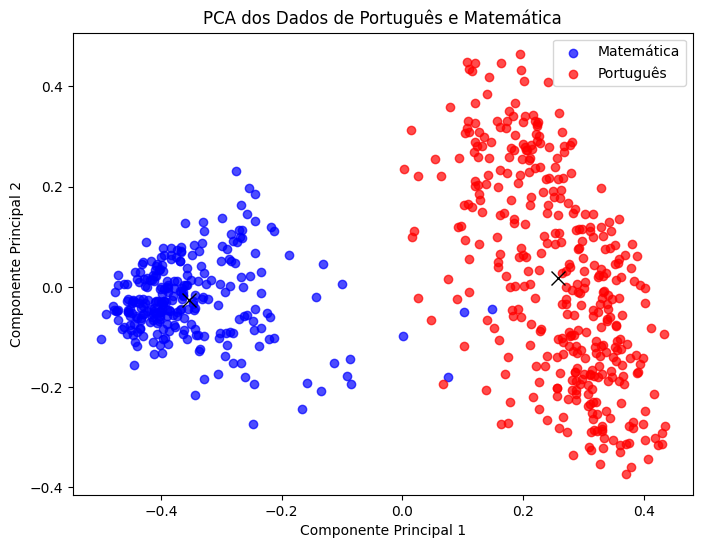

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_mat_port[0:271, 0], pca_mat_port[0:271, 1], color='blue', label='Matemática', alpha=0.7)
plt.scatter(pca_mat_port[271:, 0], pca_mat_port[271:, 1], color='red', label='Português', alpha=0.7)
plt.plot(*centroide_mat, 'x', color='black', markersize=10)
plt.plot(*centroide_port, 'x', color='black', markersize=10)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA dos Dados de Português e Matemática')
plt.legend()
plt.show()


## Analisando texto com maior distância:

In [65]:
print(chunks_mat[index_maior_distancia_mat].page_content, "\n\n\n\n\n", chunks_port[index_maior_distancia_port].page_content)

Samantha Onofre Lóssio 
Tibério Bezerra Soares
Revisão Textual
Aurea Suely Zavam
Nukácia Meyre Araújo de Almeida
Revisão Web
Antônio Carlos Marques Júnior
Débora Liberato Arruda Hissa
Saulo Garcia
Logística
Francisco Roberto Dias de Aguiar
Virgínia Ferreira Moreira
Secretários
Breno Giovanni Silva Araújo
Francisca Venâncio da Silva
Auxiliar
Ana Paula Gomes Correia
Bernardo Matias de Carvalho
Charlene Oliveira da Silveira
Isabella de Castro Britto
Vivianny de Lima Santiago
Wagner Souto Fernandes 




 anafórica, metafórica, de dêitico temporal e de locativo com valor nocional, 
que são mais abstratas que a função prototípica do item (advérbio de lugar ou 
pronome relativo). 
O uso do onde  com funções mais abstratas tende a ocorrer em contextos 
semântico-discursivos em que o falante:
